# **Ejercicios de pair programming Módulo 2 Sprint 2**
## **Limpieza: Lección 1**
### **Introducción**

---

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_bank = pd.read_csv("data/bank-additional-full.csv", index_col = 0)
pd.options.display.max_columns = None

### **IMPORTANTE**

**Estos ejercicios son complementarios a la información que viene en el gitbook. Hay que revisar primero el texto de las hipótesis antes de iniciar la resolución de ejercicios.**

1. Explora el dataset con los métodos que hemos ido aprendiendo hasta ahora para familiarizarnos con los datos.


In [3]:
df_bank.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 43170 entries, 0 to 29612
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             43170 non-null  int64  
 1   job             42823 non-null  object 
 2   marital         43085 non-null  object 
 3   education       41355 non-null  object 
 4   default         34154 non-null  float64
 5   housing         42139 non-null  float64
 6   loan            42139 non-null  float64
 7   contact         43170 non-null  object 
 8   duration        43170 non-null  int64  
 9   campaign        43170 non-null  int64  
 10  pdays           43170 non-null  int64  
 11  previous        43170 non-null  int64  
 12  poutcome        43170 non-null  object 
 13  emp.var.rate    43170 non-null  float64
 14  cons.price.idx  43170 non-null  object 
 15  cons.conf.idx   43170 non-null  object 
 16  euribor3m       43170 non-null  object 
 17  nr.employed     43170 non-null 

In [4]:
df_bank.isnull().sum()

age                  0
job                347
marital             85
education         1815
default           9016
housing           1031
loan              1031
contact              0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
month_day_week       0
dtype: int64

2. Cambia el nombre de las columnas para que no tengan puntos en el nombre. En concreto, reemplazad los "." por comas.


In [5]:
df_bank.rename(columns= {col: col.lower().replace(".", ",") for col in df_bank.columns}, inplace= True)

df_bank

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,"emp,var,rate","cons,price,idx","cons,conf,idx",euribor3m,"nr,employed",y,month_day_week
0,56,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857","5191,0",no,"['may', 'mon']"
1,57,services,MARRIED,high.school,NaN,0.0,0.0,telephone,149,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857","5191,0",no,"['may', 'mon']"
2,37,services,MARRIED,high.school,0.0,1.0,0.0,telephone,226,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857","5191,0",no,"['may', 'mon']"
3,40,admin.,MARRIED,basic.6y,0.0,0.0,0.0,telephone,151,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857","5191,0",no,"['may', 'mon']"
4,56,services,MARRIED,high.school,0.0,0.0,1.0,telephone,307,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857","5191,0",no,"['may', 'mon']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15280,36,admin.,MARRIED,university.degree,NaN,0.0,0.0,cellular,674,3,999,0,NONEXISTENT,1.4,"93,918","-42,7","4,958","5228,1",no,"['jul', 'thu']"
27570,37,unemployed,SINGLE,university.degree,0.0,0.0,1.0,cellular,104,2,999,0,NONEXISTENT,-0.1,"93,2","-42,0","4,021","5195,8",no,"['nov', 'fri']"
17746,47,services,DIVORCED,professional.course,0.0,0.0,0.0,cellular,318,1,999,0,NONEXISTENT,1.4,"93,918","-42,7","4,961","5228,1",no,"['jul', 'tue']"
30574,42,admin.,MARRIED,university.degree,0.0,1.0,0.0,cellular,20,5,999,0,NONEXISTENT,-1.8,"92,893","-46,2","1,354","5099,1",no,"['may', 'mon']"


3. ¿Hay valores duplicados en nuestro dataframe? En caso de que los haya, eliminándlos.


In [6]:
df_bank.duplicated().sum()

1994

In [7]:
df_bank.drop_duplicates(inplace = True)

df_bank

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,"emp,var,rate","cons,price,idx","cons,conf,idx",euribor3m,"nr,employed",y,month_day_week
0,56,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857","5191,0",no,"['may', 'mon']"
1,57,services,MARRIED,high.school,NaN,0.0,0.0,telephone,149,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857","5191,0",no,"['may', 'mon']"
2,37,services,MARRIED,high.school,0.0,1.0,0.0,telephone,226,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857","5191,0",no,"['may', 'mon']"
3,40,admin.,MARRIED,basic.6y,0.0,0.0,0.0,telephone,151,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857","5191,0",no,"['may', 'mon']"
4,56,services,MARRIED,high.school,0.0,0.0,1.0,telephone,307,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857","5191,0",no,"['may', 'mon']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,MARRIED,professional.course,0.0,1.0,0.0,cellular,334,1,999,0,NONEXISTENT,-1.1,"94,767","-50,8","1,028","4963,6",yes,"['nov', 'fri']"
41184,46,blue-collar,MARRIED,professional.course,0.0,0.0,0.0,cellular,383,1,999,0,NONEXISTENT,-1.1,"94,767","-50,8","1,028","4963,6",no,"['nov', 'fri']"
41185,56,retired,MARRIED,university.degree,0.0,1.0,0.0,cellular,189,2,999,0,NONEXISTENT,-1.1,"94,767","-50,8","1,028","4963,6",no,"['nov', 'fri']"
41186,44,technician,MARRIED,professional.course,0.0,0.0,0.0,cellular,442,1,999,0,NONEXISTENT,-1.1,"94,767","-50,8","1,028","4963,6",yes,"['nov', 'fri']"


4. Como hemos visto, algunas columnas no tienen el tipo de datos que deberían. Cambiad el tipo de dato para las columnas de cons.price.idx, cons.conf.idx, euribor3m, nr.employed.


In [8]:
df_bank.dtypes

age                 int64
job                object
marital            object
education          object
default           float64
housing           float64
loan              float64
contact            object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp,var,rate      float64
cons,price,idx     object
cons,conf,idx      object
euribor3m          object
nr,employed        object
y                  object
month_day_week     object
dtype: object

In [9]:
def coma_por_punto(elem):
    '''
    Reemplaza las comas por puntos en el parámetro que le pasemos.
    Args: 
        elem (str): cada valor de cada columna a la que le aplicamos la función.
    Returns:
        El valor modificado en formato string. Si no puede hacer el reemplazo, devuelve el valor sin modificar.
    '''
    try:
        return elem.replace(',','.')
    except:
        return elem

columnas_a_float = ["emp,var,rate", "cons,price,idx", "cons,conf,idx", "euribor3m", "nr,employed"]

for col in columnas_a_float:
    df_bank[col] = df_bank[col].apply(coma_por_punto)

In [10]:
df_bank.dtypes

age                 int64
job                object
marital            object
education          object
default           float64
housing           float64
loan              float64
contact            object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp,var,rate      float64
cons,price,idx     object
cons,conf,idx      object
euribor3m          object
nr,employed        object
y                  object
month_day_week     object
dtype: object

In [11]:
dicc = {i: float for i in columnas_a_float}

df_bank = df_bank.astype(dicc)

df_bank.dtypes

age                 int64
job                object
marital            object
education          object
default           float64
housing           float64
loan              float64
contact            object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp,var,rate      float64
cons,price,idx    float64
cons,conf,idx     float64
euribor3m         float64
nr,employed       float64
y                  object
month_day_week     object
dtype: object

In [12]:
df_bank

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,"emp,var,rate","cons,price,idx","cons,conf,idx",euribor3m,"nr,employed",y,month_day_week
0,56,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,1,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857,5191.0,no,"['may', 'mon']"
1,57,services,MARRIED,high.school,NaN,0.0,0.0,telephone,149,1,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857,5191.0,no,"['may', 'mon']"
2,37,services,MARRIED,high.school,0.0,1.0,0.0,telephone,226,1,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857,5191.0,no,"['may', 'mon']"
3,40,admin.,MARRIED,basic.6y,0.0,0.0,0.0,telephone,151,1,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857,5191.0,no,"['may', 'mon']"
4,56,services,MARRIED,high.school,0.0,0.0,1.0,telephone,307,1,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857,5191.0,no,"['may', 'mon']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,MARRIED,professional.course,0.0,1.0,0.0,cellular,334,1,999,0,NONEXISTENT,-1.1,94.767,-50.8,1.028,4963.6,yes,"['nov', 'fri']"
41184,46,blue-collar,MARRIED,professional.course,0.0,0.0,0.0,cellular,383,1,999,0,NONEXISTENT,-1.1,94.767,-50.8,1.028,4963.6,no,"['nov', 'fri']"
41185,56,retired,MARRIED,university.degree,0.0,1.0,0.0,cellular,189,2,999,0,NONEXISTENT,-1.1,94.767,-50.8,1.028,4963.6,no,"['nov', 'fri']"
41186,44,technician,MARRIED,professional.course,0.0,0.0,0.0,cellular,442,1,999,0,NONEXISTENT,-1.1,94.767,-50.8,1.028,4963.6,yes,"['nov', 'fri']"


5. En las columnas de marital y month, poner todos los valores en minúsculas.
💡 Pista Podréis usar una función o una lambda 💡


In [13]:
def minus (col):
    try:
        return col.lower()
    except:
        return col

df_bank["marital"] = df_bank['marital'].apply(minus)
df_bank['month_day_week'] = df_bank['month_day_week'].apply(minus)
df_bank


,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,"emp,var,rate","cons,price,idx","cons,conf,idx",euribor3m,"nr,employed",y,month_day_week
0,56,housemaid,married,basic.4y,0.0,0.0,0.0,telephone,261,1,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857,5191.0,no,"['may', 'mon']"
1,57,services,married,high.school,NaN,0.0,0.0,telephone,149,1,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857,5191.0,no,"['may', 'mon']"
2,37,services,married,high.school,0.0,1.0,0.0,telephone,226,1,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857,5191.0,no,"['may', 'mon']"
3,40,admin.,married,basic.6y,0.0,0.0,0.0,telephone,151,1,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857,5191.0,no,"['may', 'mon']"
4,56,services,married,high.school,0.0,0.0,1.0,telephone,307,1,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857,5191.0,no,"['may', 'mon']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,0.0,1.0,0.0,cellular,334,1,999,0,NONEXISTENT,-1.1,94.767,-50.8,1.028,4963.6,yes,"['nov', 'fri']"
41184,46,blue-collar,married,professional.course,0.0,0.0,0.0,cellular,383,1,999,0,NONEXISTENT,-1.1,94.767,-50.8,1.028,4963.6,no,"['nov', 'fri']"
41185,56,retired,married,university.degree,0.0,1.0,0.0,cellular,189,2,999,0,NONEXISTENT,-1.1,94.767,-50.8,1.028,4963.6,no,"['nov', 'fri']"
41186,44,technician,married,professional.course,0.0,0.0,0.0,cellular,442,1,999,0,NONEXISTENT,-1.1,94.767,-50.8,1.028,4963.6,yes,"['nov', 'fri']"


In [14]:
df_bank['poutcome'].value_counts()

NONEXISTENT    35551
FAILURE         4252
SUCCESS         1373
Name: poutcome, dtype: int64

6. Para no olvidarnos de la visualización. A través de la visualización, podemos detectar errores, valores atípicos, valores faltantes y otros problemas comunes en los datos que de otra manera podrían ser difíciles de identificar. Para esto vamos a hacer una serie de gráficas que deberán ser incluidas en un subplot. Estas gráficas tienen que ser:
- Una gráfica donde podamos ver si el tipo de trabajo afecta a que un cliente acepte la oferta.


- Una gráfica donde podamos ver si el hecho de que un cliente tenga una hipoteca afecta a que acepte la oferta.


- Una gráfica donde podamos ver si el hecho de que un cliente tenga un prestamo afecta a que acepte la oferta.


- Una gráfica donde podamos ver si hay una relación entre el numero de días desde el último contacto afecta a que un cliente acepte la oferta.


- Una gráfica donde podamos ver si hay relación entre el resultado de la campaña anterior y si el cliente afecta a que el cliente acepte la oferta.


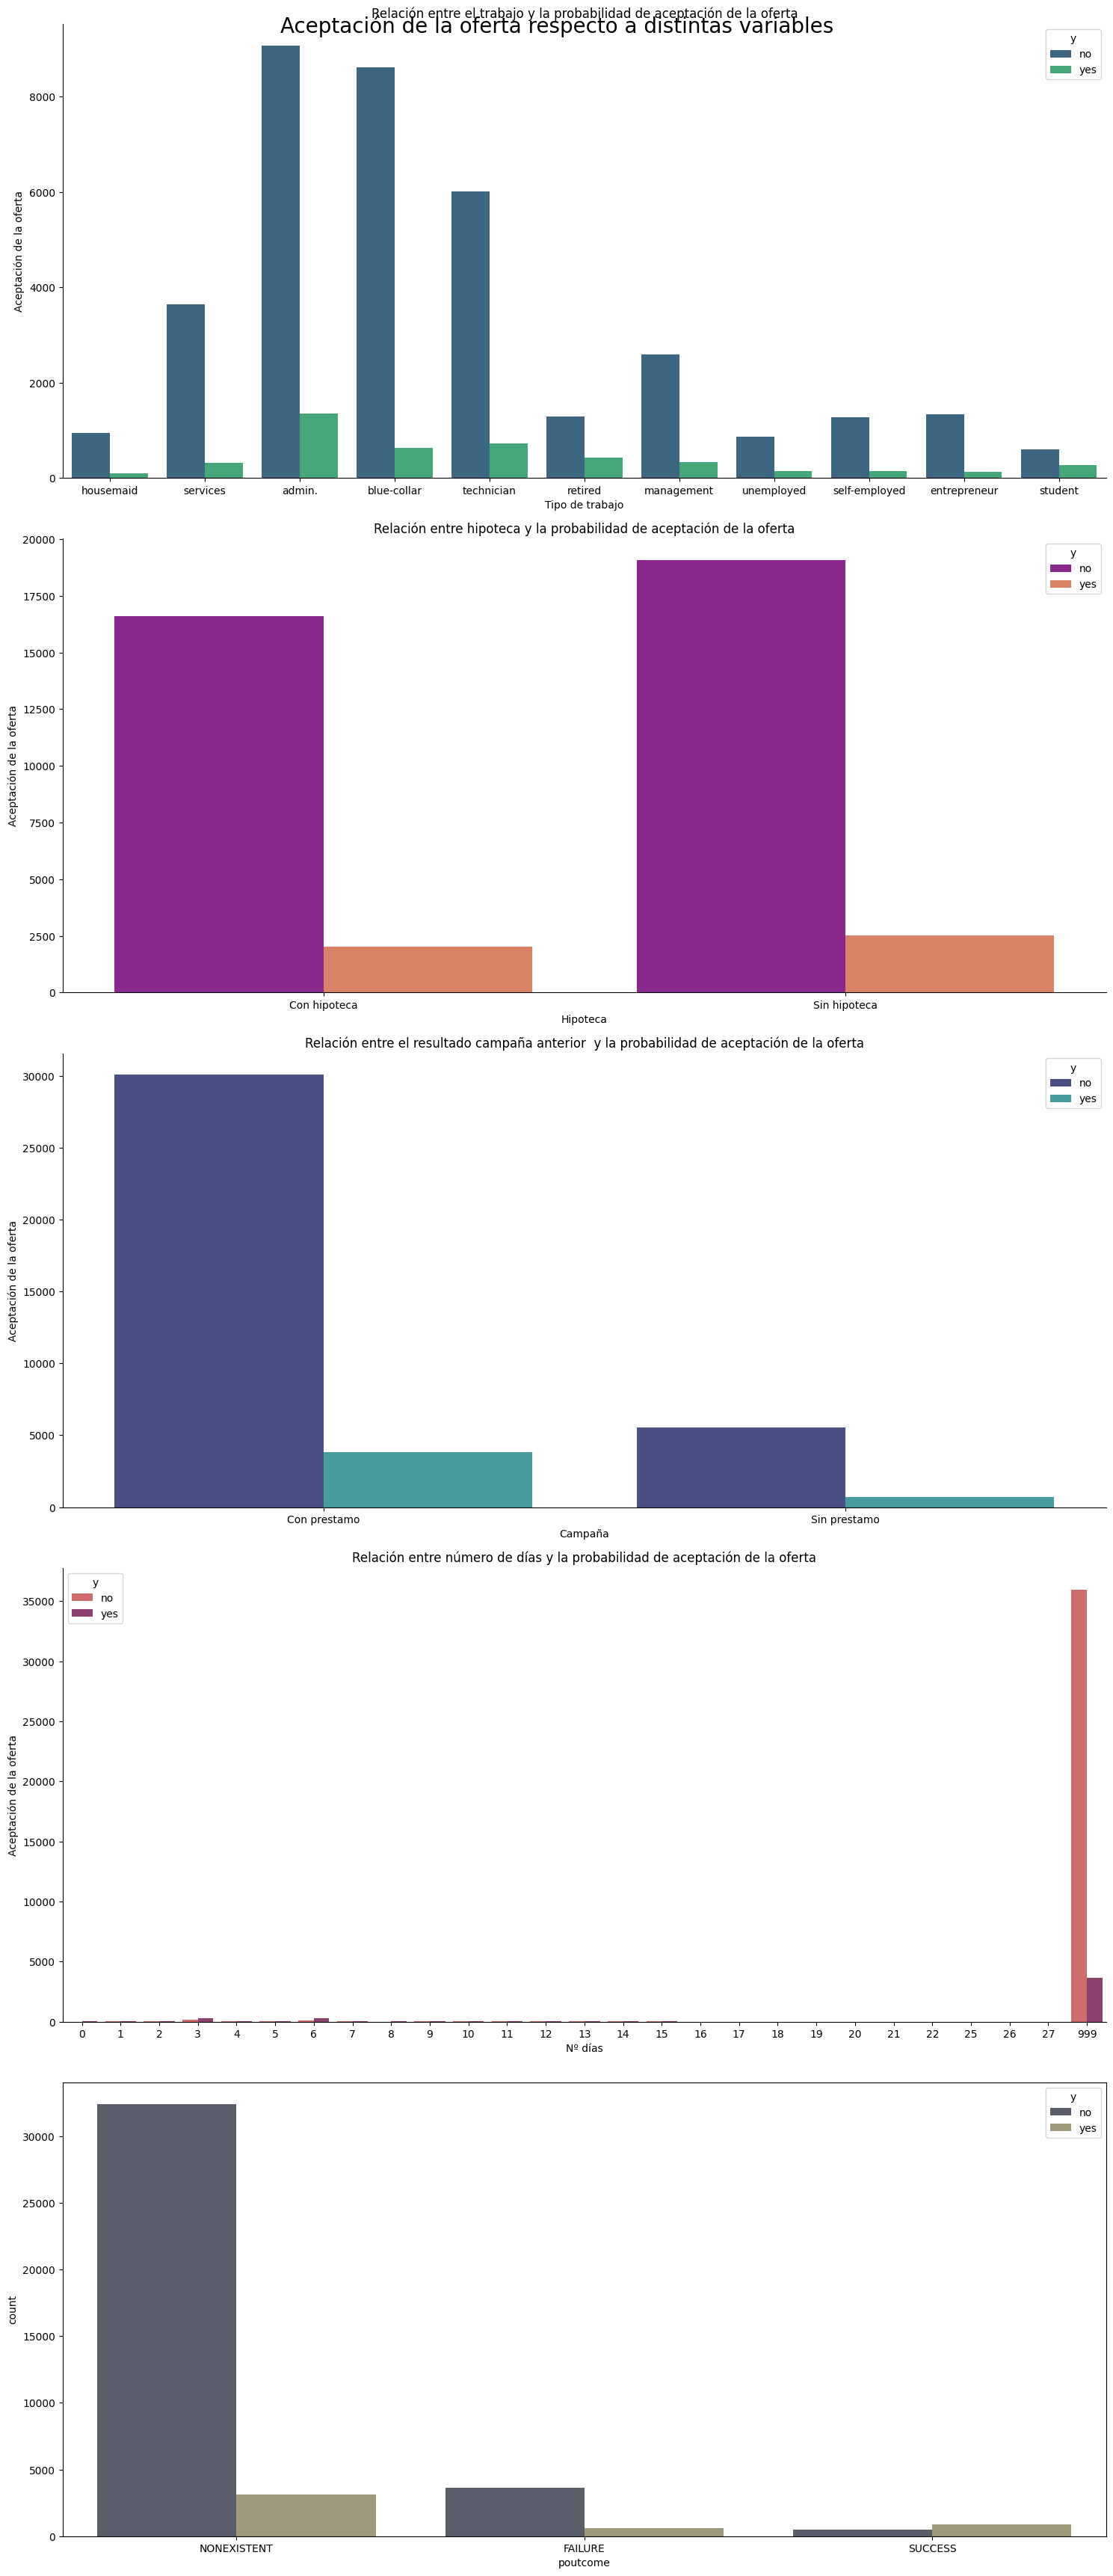

In [15]:
fig,axes = plt.subplots(5, 1, figsize = (15, 35))
fig.suptitle('Aceptación de la oferta respecto a distintas variables', fontsize = 20)

#Por Tipo de trabejo
sns.countplot(x="job", data= df_bank, hue= "y", ax= axes[0], palette = "viridis")
axes[0].set_title("Relación entre el trabajo y la probabilidad de aceptación de la oferta")
axes[0].set_xlabel('Tipo de trabajo')
axes[0].set_ylabel('Aceptación de la oferta')
axes[0].spines[['right','top']].set_visible(False)

#Por Hipoteca
sns.countplot(x="housing", data= df_bank, hue= "y",  ax= axes[1], palette = "plasma")
axes[1].set_title("Relación entre hipoteca y la probabilidad de aceptación de la oferta")
axes[1].set_xlabel('Hipoteca')
axes[1].set_ylabel('Aceptación de la oferta')
axes[1].set_xticklabels(labels= ['Con hipoteca', 'Sin hipoteca'])
axes[1].spines[['right','top']].set_visible(False)

#Por Prestamo
sns.countplot(x="loan", data= df_bank, hue= "y",  ax= axes[2], palette = "mako")
axes[2].set_title("Relación entre prestamo y la probabilidad de aceptación de la oferta")
axes[2].set_xlabel('Prestamo')
axes[2].set_ylabel('Aceptación de la oferta')
axes[2].set_xticklabels(labels= ['Con prestamo', 'Sin prestamo'])
axes[2].spines[['right','top']].set_visible(False)

#Nº días
sns.countplot(x="pdays", data= df_bank, hue= "y",  ax= axes[3], palette = "flare")
axes[3].set_title("Relación entre número de días y la probabilidad de aceptación de la oferta")
axes[3].set_xlabel('Nº días')
axes[3].set_ylabel('Aceptación de la oferta')
axes[3].spines[['right','top']].set_visible(False)

#Por campaña
sns.countplot(x="poutcome", data= df_bank, hue= "y", ax= axes[4], palette = "cividis")
axes[2].set_title("Relación entre el resultado campaña anterior  y la probabilidad de aceptación de la oferta")
axes[2].set_xlabel('Campaña')
axes[2].set_ylabel('Aceptación de la oferta')
axes[2].spines[['right','top']].set_visible(False)



plt.tight_layout()
plt.show()

7. Guardamos el csv para seguir trabajando en el siguiente ejercicio de pair de limpieza.

In [ ]:
df_bank.to_csv("data/bank-additional-full-procesado.csv")